# 大乐透历史数据_2蓝球组合移动出击线算法2022-02-15


In [1]:
# 导入模块
import pandas as pd
import numpy as np
import time
# 取当前日期和时间
date = (time.strftime("%Y-%m-%d %H:%M:%S", time.localtime()))
date

'2022-03-03 00:07:56'

In [2]:
# 导入排列组合计算函数
#调用scipy科学计算包中计算排列组合（permutation and combination）的模块
from scipy.special import perm, comb
#调用 itertools库（内置库） 获取排列组合的全部情况数
from itertools import permutations, combinations

In [3]:
# 生成所有12个蓝球取2的组合数据，并生成DataFrame赋值给dl2_2
a12 = []
for i in range(1,13):
    a12.append(i)

l12_2 = list(combinations(a12, 2))
dl12_2 = pd.DataFrame(l12_2)


In [4]:
path = '大乐透总历史开奖号码表.xlsx'
df = pd.read_excel(path)
dfa = df.iloc[:,[0,7,8]]
print(dfa.head())
dfa.shape

      期号  L1  L2
0  22022   6   7
1  22021   6   9
2  22020   8   9
3  22019   1   2
4  22018   6   9


(3973, 3)

In [5]:
# 按期号升序排序,DataFrame按指定列排序_升序
dfa1 = dfa.sort_values(by='期号')
# DataFrame重新建索引
dfb = dfa1.reset_index().drop('index', axis = 1)
# 排序后存盘excel文件
dfb.to_excel('大乐透历史数据蓝球数据_升序-组合.xlsx', index=False)
dfb.shape

(3973, 3)

In [6]:
df1 = pd.read_excel('大乐透历史数据蓝球数据_升序-组合.xlsx')
df1['球号组合'] = 0
df1['次数'] = 0
df1['间隔'] = 0
df1a = df1
df1a.to_excel('大乐透历史数据蓝球均线数据_升序-组合.xlsx', index=False)
df1a.head()


,期号,L1,L2,球号组合,次数,间隔
0,7001,4,11,0,0,0
1,7002,5,12,0,0,0
2,7003,1,6,0,0,0
3,7004,2,4,0,0,0
4,7005,2,11,0,0,0


In [7]:
df1.shape[0]


3973

In [8]:
# 读入大乐透历史数据红球均线数据_升序.xlsx为df1a
df1a = pd.read_excel('大乐透历史数据蓝球均线数据_升序-组合.xlsx')
# 生成12取2的球号组合
lx_2 = list(combinations(a12, 2))
dlx_2 = pd.DataFrame(lx_2)

# 计算df1a对应的每x期的移动出击次数线数据
# 计算移动每个x期中2球组合出击次数
print("### 日期时间：", date)
x = 12

for ii in range(dlx_2.shape[0]):
# for ii in range(3): 
    df1a.球号组合 = str(list(dlx_2.loc[ii]))
    df1a['次数'] = 0
    c = 0

    for m in range(x,df1a.shape[0]):        
        a = 0
        bb=0
        for i1 in range(x):
            i = m+(i1-x)
            h1 = df1a.loc[i,'L1']
            h2 = df1a.loc[i,'L2']

            if dlx_2.loc[ii,0]==h1 or dlx_2.loc[ii,0]==h2:
                a=a+1
            if dlx_2.loc[ii,1]==h1 or dlx_2.loc[ii,1]==h2:
                a=a+1
            #print(a, bb)
            if a>=1:                
                bb = bb + 1
                a = 0
                c = 0
            else:
                c = c+1
                a = 0
                
        df1a.loc[[i],['次数']] = bb
        df1a.loc[[i],['间隔']] = c

    
    path1 = 'D:\\python_work\\大乐透算法\\2个蓝球66个组合移动12期出击次数数据\\'+str(list(dlx_2.loc[ii]))+'组合移动'+str(x)+'期出击次数数据_MAX='+str(df1a.次数.max())+'.xlsx'
    print('球号组合序号:', ii, path1)
    df1a.to_excel(path1, index=False)

    if ii==0:
        df1b = df1a.copy()
    else:
        # 合并连接二个DataFrame        
        df1b = pd.concat([df1b, df1a])
df1b.to_excel('D:\\python_work\\大乐透算法\\2个蓝球66个组合移动12期出击次数数据\\大乐透历史数据蓝球(汇总全部66个组合)移动线数据.xlsx', index=False)

print('END', '='*80, 'END')



### 日期时间： 2022-03-03 00:07:56
球号组合序号: 0 D:\python_work\大乐透算法\2个蓝球66个组合移动12期出击次数数据\[1, 2]组合移动12期出击次数数据_MAX=12.xlsx
球号组合序号: 1 D:\python_work\大乐透算法\2个蓝球66个组合移动12期出击次数数据\[1, 3]组合移动12期出击次数数据_MAX=12.xlsx
球号组合序号: 2 D:\python_work\大乐透算法\2个蓝球66个组合移动12期出击次数数据\[1, 4]组合移动12期出击次数数据_MAX=10.xlsx
球号组合序号: 3 D:\python_work\大乐透算法\2个蓝球66个组合移动12期出击次数数据\[1, 5]组合移动12期出击次数数据_MAX=12.xlsx
球号组合序号: 4 D:\python_work\大乐透算法\2个蓝球66个组合移动12期出击次数数据\[1, 6]组合移动12期出击次数数据_MAX=10.xlsx
球号组合序号: 5 D:\python_work\大乐透算法\2个蓝球66个组合移动12期出击次数数据\[1, 7]组合移动12期出击次数数据_MAX=12.xlsx
球号组合序号: 6 D:\python_work\大乐透算法\2个蓝球66个组合移动12期出击次数数据\[1, 8]组合移动12期出击次数数据_MAX=12.xlsx
球号组合序号: 7 D:\python_work\大乐透算法\2个蓝球66个组合移动12期出击次数数据\[1, 9]组合移动12期出击次数数据_MAX=12.xlsx
球号组合序号: 8 D:\python_work\大乐透算法\2个蓝球66个组合移动12期出击次数数据\[1, 10]组合移动12期出击次数数据_MAX=12.xlsx
球号组合序号: 9 D:\python_work\大乐透算法\2个蓝球66个组合移动12期出击次数数据\[1, 11]组合移动12期出击次数数据_MAX=12.xlsx
球号组合序号: 10 D:\python_work\大乐透算法\2个蓝球66个组合移动12期出击次数数据\[1, 12]组合移动12期出击次数数据_MAX=10.xlsx
球号组合序号: 11 D:\python_work\大乐透算法\2个蓝球66个组合移

In [9]:
df1a.次数.max()

12

In [10]:
df1b.次数.max()

12

In [11]:
data = df1b.values
column = df1b.columns
column

Index(['期号', 'L1', 'L2', '球号组合', '次数', '间隔'], dtype='object')

In [12]:
df1d = pd.DataFrame(data, columns=column,index=[df1b['球号组合'], df1b['期号']], )
path3 = 'D:\\python_work\\大乐透算法\\2个蓝球66个组合移动12期出击次数数据\\'+'大乐透历史数据蓝球(汇总全部66个组合)移动线数据_二层索引.xlsx'
df1d.to_excel(path3, index=True)
df1d.shape

(262218, 6)

In [13]:
df1d.index.names

FrozenList(['球号组合', '期号'])

In [14]:
# 计算21年至今及20年前100期数据
df2b = df1b[df1b.期号>=21000]
df2a = df2b[df2b.期号<21100]
df2  = df1b[df1b.期号>=21100]

In [15]:
print('# 计算21年100期后,df2.次数.max()-1=', df2.次数.max()-1)
c9 = list(df2[df2.次数>=df2.次数.max()-1].球号组合)
cb = []
cb.append(c9[0])
for i in c9:
    if i in cb:
        pass
    else:
        cb.append(i)
print('# 计算21年100期后,最大出击次数-1的球cb')
print(len(cb),cb)


# 计算21年100期前最大出击次数-1的球cc
df2b = df1b[df1b.期号>=21000]
df2a = df2b[df2b.期号<21100]
print('# 计算21年100期前,最大出击次数-1的球cc')
print('df2a.次数.max()-1:', df2a.次数.max()-1)
c9 = list(df2a[df2a.次数>=df2a.次数.max()-1].球号组合)
cc = []
cc.append(c9[0])
for i in c9:
    if i in cc:
        pass
    else:
        cc.append(i)
print(len(cc),cc)


# 计算cc球组中去除cb后的球赋值cd
cd = []
for i in cc:
    if i in cb:
        pass
    else:
        cd.append(i)
print('# 计算cc球组中去除cb后的球赋值cd')
print(len(cd),cd)



# 计算21年100期后,df2.次数.max()-1= 9
# 计算21年100期后,最大出击次数-1的球cb
7 ['[2, 11]', '[5, 6]', '[5, 8]', '[5, 9]', '[5, 11]', '[6, 11]', '[9, 11]']
# 计算21年100期前,最大出击次数-1的球cc
df2a.次数.max()-1: 9
11 ['[1, 10]', '[2, 4]', '[3, 7]', '[4, 7]', '[4, 8]', '[4, 10]', '[5, 7]', '[5, 8]', '[7, 9]', '[7, 11]', '[8, 10]']
# 计算cc球组中去除cb后的球赋值cd
10 ['[1, 10]', '[2, 4]', '[3, 7]', '[4, 7]', '[4, 8]', '[4, 10]', '[5, 7]', '[7, 9]', '[7, 11]', '[8, 10]']


In [16]:
print('### cb:', list(cb))
print('### cd:', list(cd))


### cb: ['[2, 11]', '[5, 6]', '[5, 8]', '[5, 9]', '[5, 11]', '[6, 11]', '[9, 11]']
### cd: ['[1, 10]', '[2, 4]', '[3, 7]', '[4, 7]', '[4, 8]', '[4, 10]', '[5, 7]', '[7, 9]', '[7, 11]', '[8, 10]']


## 画图

In [17]:
# 导入需要的函数
from bokeh.plotting import figure, output_notebook, show
import seaborn as sns
from matplotlib import pyplot as plt


In [18]:
# df2b[df2b.球号组合==cb[0]]

In [19]:
k =56

In [42]:
for i in range(len(cb)):
    # 计算x/y的数据
    y1 = df2b[df2b.球号组合==cb[i]].次数[-k:].max()
    y2 = df2b[df2b.球号组合==cb[i]].间隔[-k:].max()
    print(cb[i],int(y1*10)/10, int(y2*10)/10)

print('='*50)
for i in range(len(cd)):
    # 计算x/y的数据
    y1 = df2b[df2b.球号组合==cd[i]].次数[-k:].max()
    y2 = df2b[df2b.球号组合==cd[i]].间隔[-k:].max()
    print(cd[i],int(y1*10)/10, int(y2*10)/10)
    

[2, 11] 7.0 6.0
[5, 6] 9.0 9.0
[5, 8] 9.0 6.0
[5, 9] 10.0 8.0
[5, 11] 9.0 4.0
[6, 11] 9.0 6.0
[9, 11] 9.0 5.0
[1, 10] 5.0 10.0
[2, 4] 6.0 8.0
[3, 7] 6.0 47.0
[4, 7] 6.0 8.0
[4, 8] 6.0 59.0
[4, 10] 6.0 9.0
[5, 7] 8.0 5.0
[7, 9] 7.0 23.0
[7, 11] 7.0 5.0
[8, 10] 5.0 8.0


In [41]:
for i in range(len(cb)):
    # 计算x/y的数据
    y1 = df2b[df2b.球号组合==cb[i]].次数[-k:].mean()
    y2 = df2b[df2b.球号组合==cb[i]].间隔[-k:].mean()
    print(cb[i],int(y1*10)/10, int(y2*10)/10)

print('='*50)
for i in range(len(cd)):
    # 计算x/y的数据
    y1 = df2b[df2b.球号组合==cd[i]].次数[-k:].mean()
    y2 = df2b[df2b.球号组合==cd[i]].间隔[-k:].mean()
    print(cd[i],int(y1*10)/10, int(y2*10)/10)
   

[2, 11] 4.0 1.5
[5, 6] 4.5 1.5
[5, 8] 4.6 1.3
[5, 9] 6.1 1.0
[5, 11] 5.6 0.9
[6, 11] 4.8 1.3
[9, 11] 5.7 0.9
[1, 10] 2.7 2.8
[2, 4] 3.4 1.9
[3, 7] 2.6 4.4
[4, 7] 3.2 2.1
[4, 8] 3.0 5.3
[4, 10] 3.2 2.1
[5, 7] 4.6 1.1
[7, 9] 4.2 2.3
[7, 11] 4.0 1.6
[8, 10] 3.2 2.2


[2, 11]球号组合每期移动出击次数线


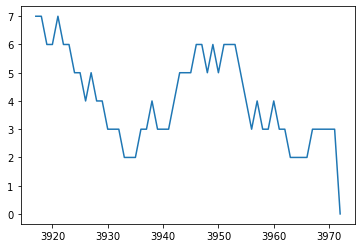

[5, 6]球号组合每期移动出击次数线


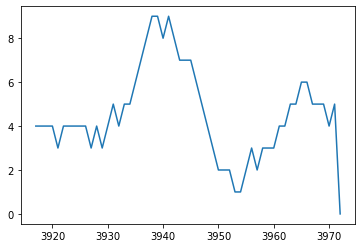

[5, 8]球号组合每期移动出击次数线


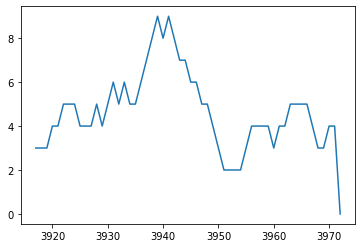

[5, 9]球号组合每期移动出击次数线


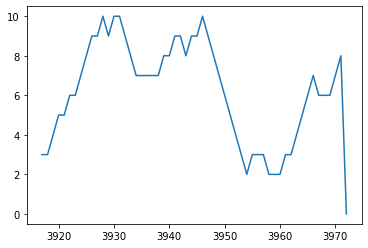

[5, 11]球号组合每期移动出击次数线


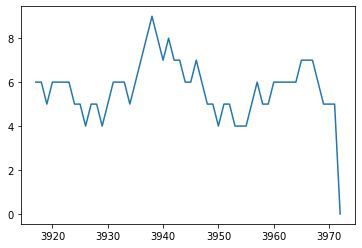

[6, 11]球号组合每期移动出击次数线


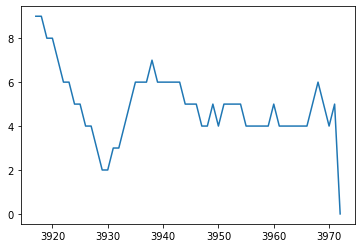

[9, 11]球号组合每期移动出击次数线


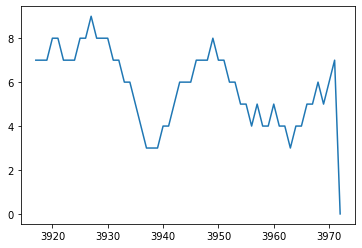

[2, 11]号球每期移动间隔次数线


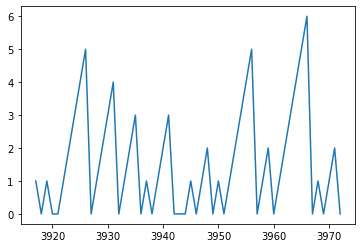

[5, 6]号球每期移动间隔次数线


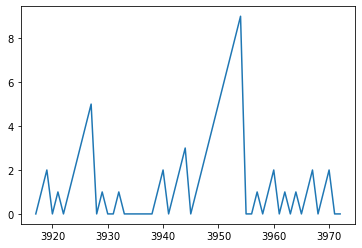

[5, 8]号球每期移动间隔次数线


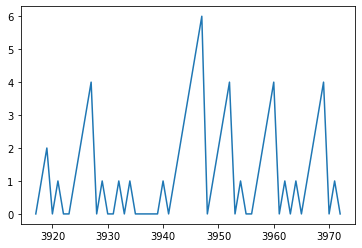

[5, 9]号球每期移动间隔次数线


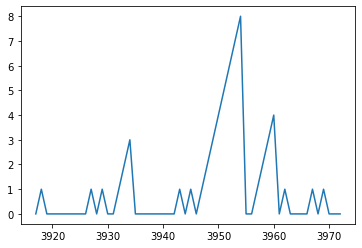

[5, 11]号球每期移动间隔次数线


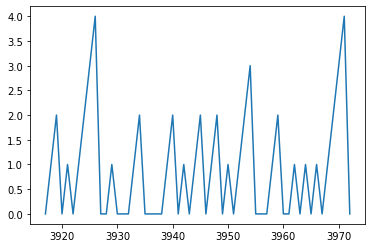

[6, 11]号球每期移动间隔次数线


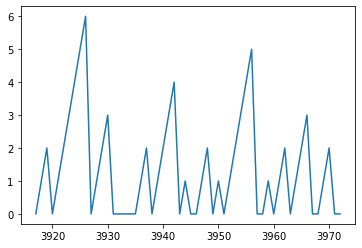

[9, 11]号球每期移动间隔次数线


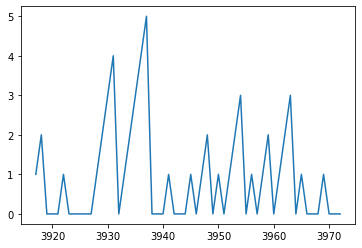

In [24]:
# 循环遍历各球号组合画出每x期移动出击次数线
for i in range(len(cb)):
    # 计算x/y的数据
    y1 = df2b[df2b.球号组合==cb[i]].次数[-k:]
    x1 = df2b[df2b.球号组合==cb[i]].期号[-k:]
    # 创建画布 p，设置 x_axis_type='datetime'
    #plt.figure(figsize=(20,6),dpi=600)
    plt.figure()
    print(str(cb[i])+'球号组合每期移动出击次数线')
    plt.plot(x1.index, y1)
    plt.title=str(cb[i])+'球号组合每期移动出击次数线'
    plt.show()

    
# 循环遍历各球画出每x期移动出击次数线
for i in range(len(cb)):
    # 计算x/y的数据
    y1 = df1b[df1b.球号组合==cb[i]].间隔[-k:]
    x1 = df1b[df1b.球号组合==cb[i]].期号[-k:]
    # 创建画布 p，设置 x_axis_type='datetime'
    #plt.figure(figsize=(40,6),dpi=600)
    plt.figure()
    print(str(cb[i])+'号球每期移动间隔次数线')
    plt.plot(x1.index, y1)
    plt.title=str(cb[i])+'号球每期移动间隔次数线'
    plt.show()
 
    

[1, 10]球号组合每期移动出击次数线


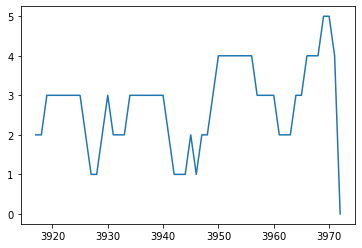

[2, 4]球号组合每期移动出击次数线


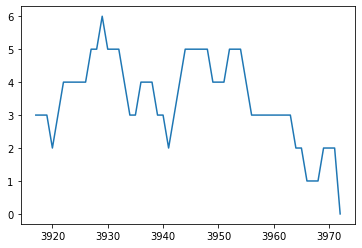

[3, 7]球号组合每期移动出击次数线


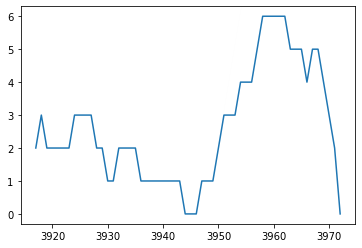

[4, 7]球号组合每期移动出击次数线


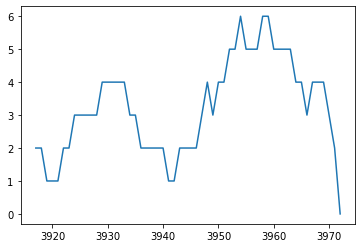

[4, 8]球号组合每期移动出击次数线


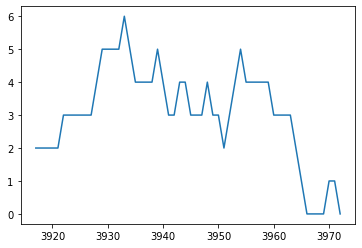

[4, 10]球号组合每期移动出击次数线


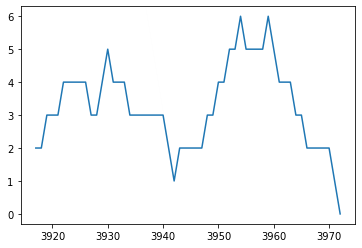

[5, 7]球号组合每期移动出击次数线


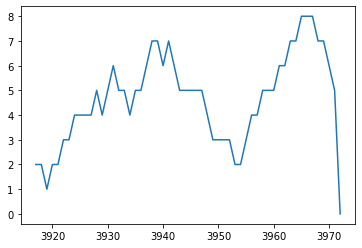

[7, 9]球号组合每期移动出击次数线


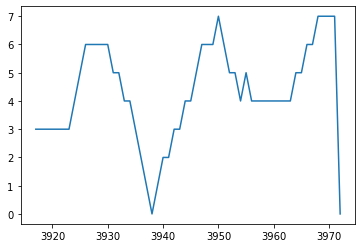

[7, 11]球号组合每期移动出击次数线


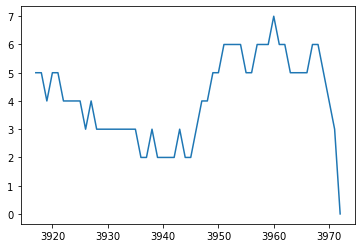

[8, 10]球号组合每期移动出击次数线


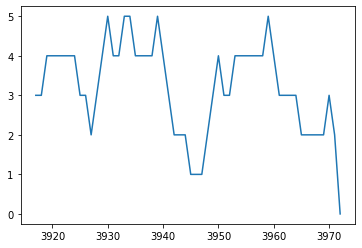

[1, 10]号球每期移动间隔次数线


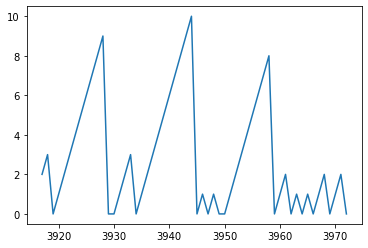

[2, 4]号球每期移动间隔次数线


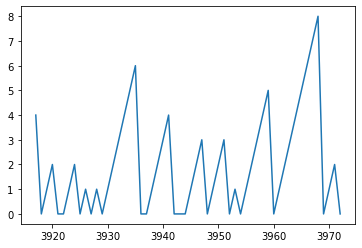

[3, 7]号球每期移动间隔次数线


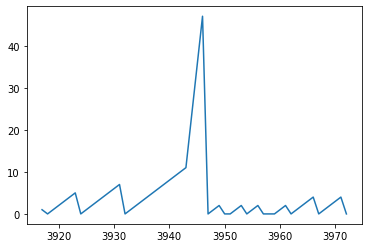

[4, 7]号球每期移动间隔次数线


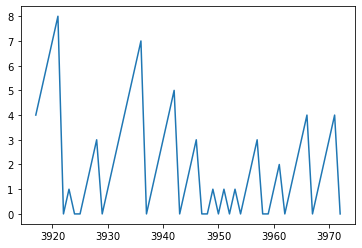

[4, 8]号球每期移动间隔次数线


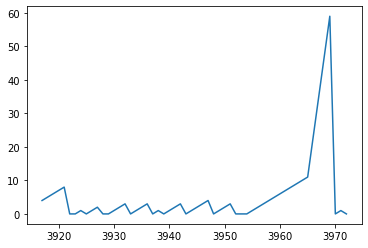

[4, 10]号球每期移动间隔次数线


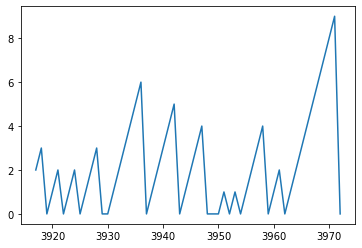

[5, 7]号球每期移动间隔次数线


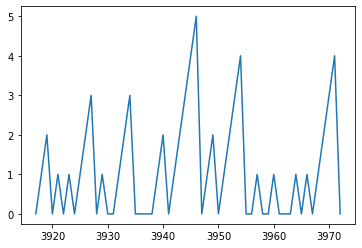

[7, 9]号球每期移动间隔次数线


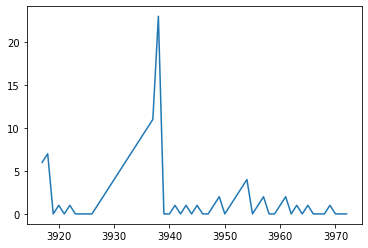

[7, 11]号球每期移动间隔次数线


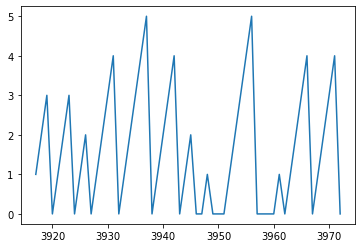

[8, 10]号球每期移动间隔次数线


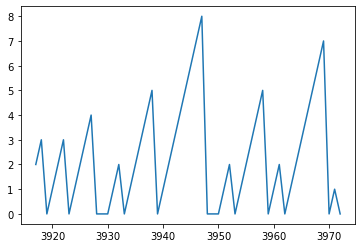

In [23]:
# 循环遍历各球号组合画出每x期移动出击次数线
for i in range(len(cd)):
    # 计算x/y的数据
    y1 = df2b[df2b.球号组合==cd[i]].次数[-k:]
    x1 = df2b[df2b.球号组合==cd[i]].期号[-k:]
    # 创建画布 p，设置 x_axis_type='datetime'
    #plt.figure(figsize=(20,6),dpi=600)
    plt.figure()
    print(str(cd[i])+'球号组合每期移动出击次数线')
    plt.plot(x1.index, y1)
    plt.title=str(cd[i])+'球号组合每期移动出击次数线'
    plt.show()

    
# 循环遍历各球画出每x期移动出击次数线
for i in range(len(cd)):
    # 计算x/y的数据
    y1 = df1b[df1b.球号组合==cd[i]].间隔[-k:]
    x1 = df1b[df1b.球号组合==cd[i]].期号[-k:]
    # 创建画布 p，设置 x_axis_type='datetime'
    #plt.figure(figsize=(40,6),dpi=600)
    plt.figure()
    print(str(cd[i])+'号球每期移动间隔次数线')
    plt.plot(x1.index, y1)
    plt.title=str(cd[i])+'号球每期移动间隔次数线'
    plt.show()
 
    

In [33]:
w1 = [] 
w2 = []
for i in range(2,35):
    w1.append(str(i)+', '+str(int(comb(35,i))))
w1   

['2, 595',
 '3, 6545',
 '4, 52360',
 '5, 324632',
 '6, 1623160',
 '7, 6724520',
 '8, 23535820',
 '9, 70607460',
 '10, 183579396',
 '11, 417225900',
 '12, 834451800',
 '13, 1476337800',
 '14, 2319959400',
 '15, 3247943160',
 '16, 4059928949',
 '17, 4537567650',
 '18, 4537567650',
 '19, 4059928949',
 '20, 3247943160',
 '21, 2319959400',
 '22, 1476337800',
 '23, 834451800',
 '24, 417225900',
 '25, 183579396',
 '26, 70607460',
 '27, 23535820',
 '28, 6724520',
 '29, 1623160',
 '30, 324632',
 '31, 52360',
 '32, 6545',
 '33, 595',
 '34, 35']